# Daily Challege: NumPy, Pandas & Matplotlib Integration

1. Data Import and Cleaning:

    - Import the dataset using Pandas.
    - Identify missing values and handle them appropriately.
    - Use NumPy to convert relevant columns to numerical types if necessary.



In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"global_power_plant_database.csv")
df.columns

C:\Users\julie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


First, I want to remove the columns with tons of NaNs.

In [4]:
df = df.dropna(axis=1, thresh = 3*len(df)/4) 
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,GEODB,http://globalenergyobservatory.org,GEODB,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,GEODB,http://globalenergyobservatory.org,GEODB,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,GEODB,http://globalenergyobservatory.org,GEODB,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34932,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34933,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,GEODB,http://globalenergyobservatory.org,GEODB,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


I have a lot less columns now. Next step is dropping duplicates:

In [5]:
print(len(df))
df = df.drop_duplicates()
print(len(df))

34936
34936


There were no duplicates. Now I will fill missing values with mean column values.

In [6]:
df = df.fillna(df.mean())


C:\Users\julie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Before changing columns into numerical values, I want to see what I'm being asked to analyze.

2. Exploratory Data Analysis:

    - Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
    - Explore the distribution of power plants by country and fuel type.



In [7]:
df.describe()

,capacity_mw,latitude,longitude,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,34936.000000
mean,163.355148,32.816637,-6.972803,716.443378
std,489.636072,22.638603,78.405850,2419.585416
min,1.000000,-77.847000,-179.977700,0.000000
25%,4.900000,29.256475,-77.641550,8.960000
50%,16.745000,39.727750,-2.127100,45.355000
75%,75.344250,46.263125,49.502675,354.372500
max,22500.000000,71.292000,179.388700,82810.770000


The row indicating 50% is by definition the median. 

In the table above is summarized all the requested information.

In [8]:
country_distribution =  df['country'].value_counts()
fuel_distribution = df['primary_fuel'].value_counts()

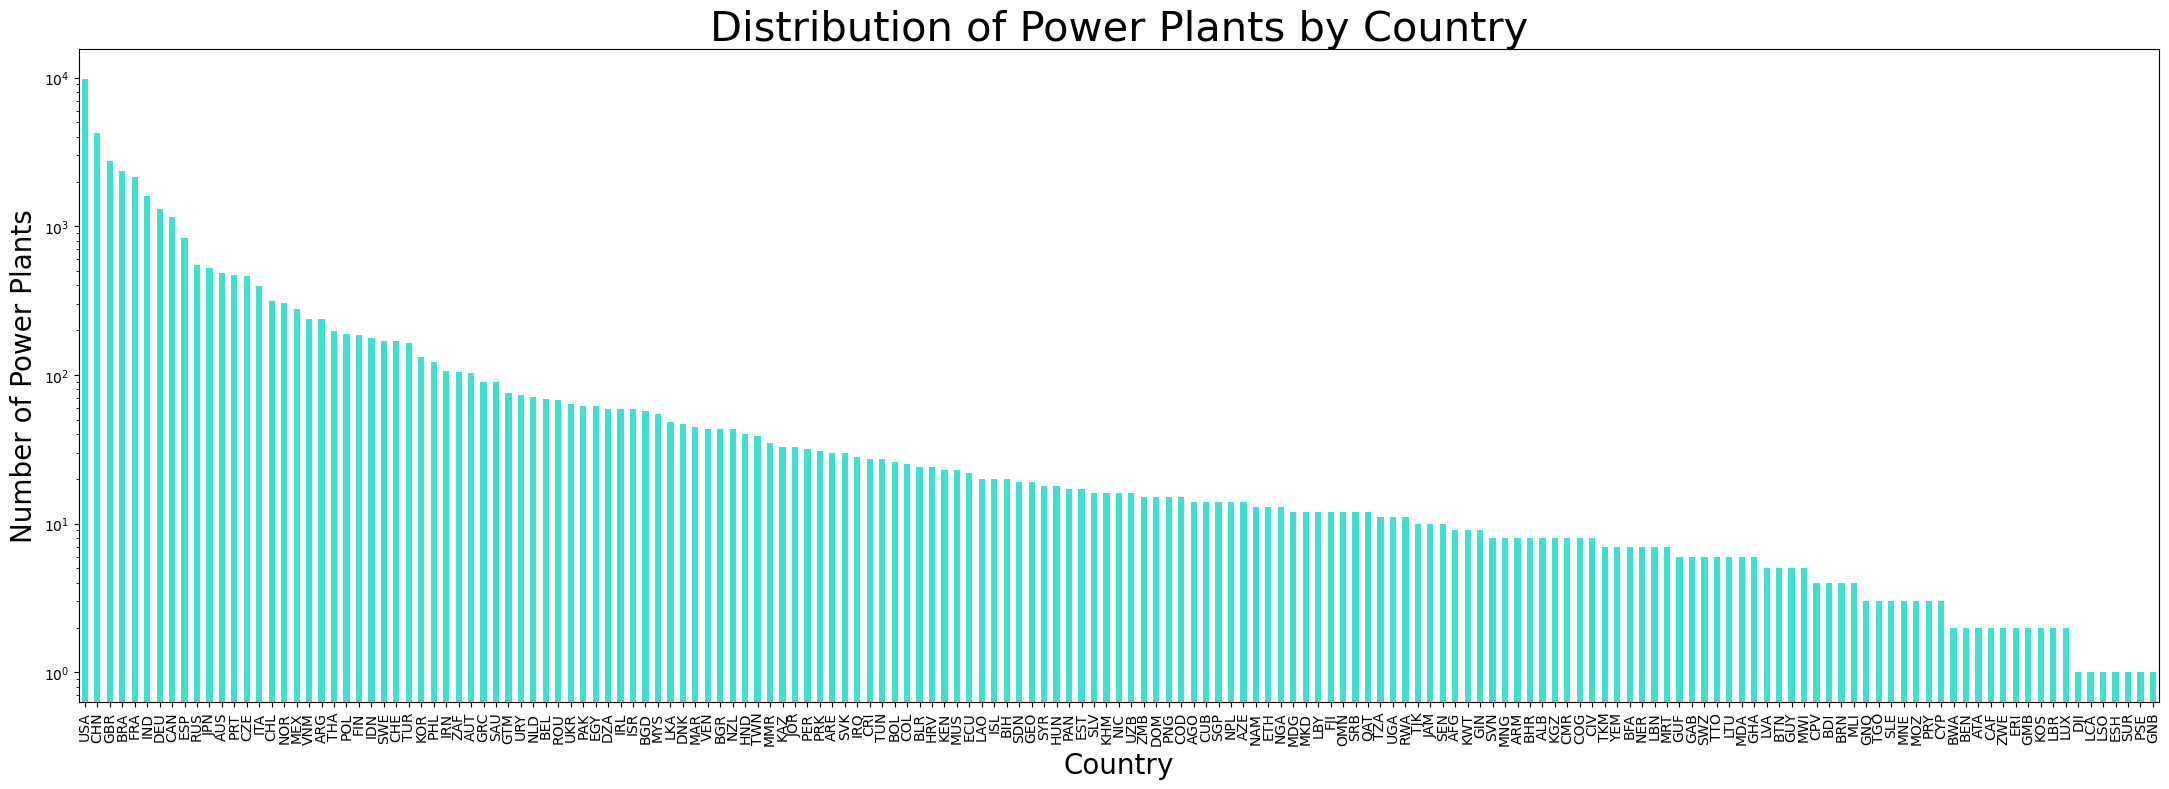

In [9]:
country_distribution.plot(kind='bar', figsize=(22,8), color = 'turquoise')
plt.title('Distribution of Power Plants by Country', fontsize = 30)
plt.xlabel('Country', fontsize = 20)
plt.ylabel('Number of Power Plants', fontsize = 20)
plt.tight_layout()
plt.yscale('log')
plt.show()

In [10]:
country_distribution[0:5].sum()/country_distribution.sum()

0.6106594916418594

This graph is in a logarithmic scale, therefore, the first countries are the ones which contribute more to the total amount of power plants in the world. USA, China, Great Britain, France, Brazil and India are responsible for 61% of the total amount of power plants worldwide.

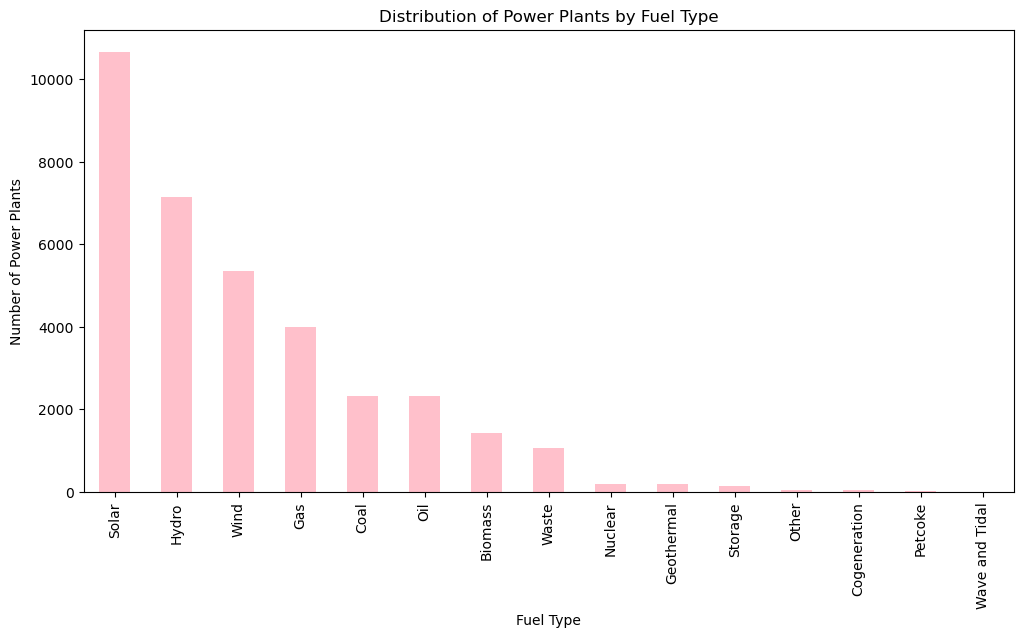

In [11]:
fuel_distribution.plot(kind='bar', figsize=(12,6), color='pink')
plt.title('Distribution of Power Plants by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Power Plants')
plt.show()

Most of the power plants are solar powered.

3. Statistical Analysis:

    - Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
    - Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

In [12]:
mean_power= df.groupby('primary_fuel')['capacity_mw'].mean()
std_power = df.groupby('primary_fuel')['capacity_mw'].std()

In [13]:
mean_power

primary_fuel
Biomass             23.972938
Coal               843.579828
Cogeneration        98.731707
Gas                373.449375
Geothermal          67.130952
Hydro              147.171551
Nuclear           2091.855179
Oil                112.878754
Other               84.020000
Petcoke            202.048125
Solar               17.657039
Storage             12.683704
Waste               13.809657
Wave and Tidal      55.220000
Wind                49.224126
Name: capacity_mw, dtype: float64

In [14]:
std_power

primary_fuel
Biomass             39.461805
Coal               888.187187
Cogeneration       283.428252
Gas                560.934146
Geothermal         114.640890
Hydro              549.809328
Nuclear           1303.509273
Oil                392.009039
Other              145.891392
Petcoke            476.986459
Solar               41.939412
Storage             35.574631
Waste               20.582503
Wave and Tidal     101.440708
Wind               106.138355
Name: capacity_mw, dtype: float64

For each fuel type I get its mean +/- its standard deviation. We see that maximum power is obtained with nuclear reactors.

In [15]:
nuclear_data = df[df['primary_fuel'] == 'Nuclear']['capacity_mw']
gas_data = df[df['primary_fuel'] == 'Gas']['capacity_mw']
oil_data = df[df['primary_fuel'] == 'Oil']['capacity_mw']
solar_data = df[df['primary_fuel'] == 'Solar']['capacity_mw']

Now I want to check if the mean power output differs significantly between different fuel types.

I will use stats.ttest_ind. According to the documentations: 

Calculate the T-test for the means of two independent samples of scores.

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

The null hypothesis is that nuclear and gas have the same mean power. 

In [16]:
t_stat, p_value = stats.ttest_ind(nuclear_data, gas_data)

In [17]:
t_stat, p_value

(38.07452291912129, 1.0934344703645503e-272)

p-value is well below 0.05, that means we can reject the null hypothesis.

In [19]:
import scipy
n1, n2 = len(nuclear_data), len(gas_data)
DF = n1 + n2 -2

alpha = 0.05
critical_value = scipy.stats.t.ppf(1 - alpha/2, DF)

# Output the critical value
print("Critical Value:", critical_value)

Critical Value: 1.9605301846933478


We see here that the t-stat is way above the critical value, that means that the observed differences between the two groups are statistically significant.

4. Time Series Analysis:

    - If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
    - Explore how the mix of fuel types for power generation has evolved over the years.

In [21]:
df = pd.read_csv(r"global_power_plant_database.csv")
yearly_counts = df['commissioning_year'].value_counts().sort_index()
print(yearly_counts)

years = yearly_counts.index.to_numpy()
counts = yearly_counts.values

window = 5
moving_avg = np.convolve(counts, np.ones(window)/window, mode='valid')
print(moving_avg)

1896.000000      1
1899.000000      1
1900.000000      6
1901.000000      2
1902.000000      4
              ... 
2019.000000    596
2019.000000      1
2019.411765      1
2019.796326      1
2020.000000    150
Name: commissioning_year, Length: 2023, dtype: int64
[  2.8   3.4   3.4 ... 120.  120.  149.8]


C:\Users\julie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
fuel_by_year = df.groupby(['commissioning_year', 'primary_fuel']).size().unstack().fillna(0)
print(fuel_by_year)

primary_fuel        Hydro   Gas  Oil  Biomass  Coal  Other  Waste  \
commissioning_year                                                  
1896.000000           1.0   0.0  0.0      0.0   0.0    0.0    0.0   
1899.000000           1.0   0.0  0.0      0.0   0.0    0.0    0.0   
1900.000000           3.0   1.0  2.0      0.0   0.0    0.0    0.0   
1901.000000           2.0   0.0  0.0      0.0   0.0    0.0    0.0   
1902.000000           4.0   0.0  0.0      0.0   0.0    0.0    0.0   
...                   ...   ...  ...      ...   ...    ...    ...   
2019.000000           1.0  34.0  2.0      2.0   0.0    0.0    3.0   
2019.000000           0.0   0.0  1.0      0.0   0.0    0.0    0.0   
2019.411765           0.0   0.0  0.0      0.0   0.0    0.0    0.0   
2019.796326           0.0   0.0  0.0      0.0   0.0    0.0    0.0   
2020.000000           0.0   6.0  0.0      1.0   0.0    0.0    2.0   

primary_fuel        Cogeneration  Petcoke  Nuclear  Geothermal  Wind  Solar  \
commissioning_year     

5. Advanced Visualization:

    - Create visualizations using Matplotlib and Seaborn to illustrate your findings.
    - Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.



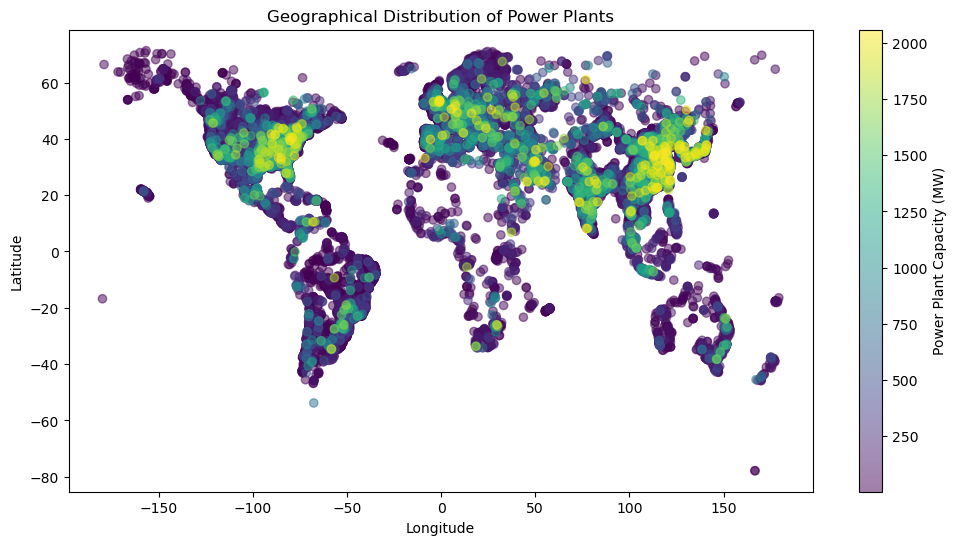

In [147]:
df2 = df.sort_values(by= 'capacity_mw', ascending = True).head(34500)
plt.figure(figsize=(12,6))
plt.scatter(df2['longitude'], df2['latitude'], alpha=0.5, c=df2['capacity_mw'], cmap='viridis')
plt.colorbar(label='Power Plant Capacity (MW)')
plt.title('Geographical Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

6. Matrix Operations in Real-World Context:

    - Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
    - Discuss the relevance of eigenvectors and eigenvalues in this context.



In [24]:
# Pivot table as a matrix
matrix = pd.pivot_table(df, values='capacity_mw', index='primary_fuel', columns='country', aggfunc='sum').fillna(0)
matrix_np = matrix.to_numpy()

# Compute covariance matrix
cov_matrix = np.cov(matrix_np)
print("Covariance Matrix:\n", cov_matrix)

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Covariance Matrix:
 [[ 1.24575038e+06  7.87423491e+06  5.58314113e+04  1.75768524e+07
   1.08945558e+05  1.16714152e+07  3.87411069e+06  1.65287394e+06
   3.62378600e+04  7.00326239e+04  1.48041822e+06  3.16089727e+04
   3.26929957e+05  1.32311590e+03  4.29279486e+06]
 [ 7.87423491e+06  6.07471178e+09  1.49958654e+06  1.16700506e+09
   5.70704407e+06  1.66759708e+09  3.63836731e+08  6.28899172e+07
   8.94420531e+05  3.37445008e+06  3.97638586e+08  1.16914796e+06
   1.42963439e+07  2.07210676e+04  4.43393880e+08]
 [ 5.58314113e+04  1.49958654e+06  6.03836049e+04  3.75375705e+06
   2.25602495e+04  5.99586202e+05  7.56209714e+05  2.01656884e+05
   3.06546268e+03  1.44699795e+04  3.67937037e+05  2.11074100e+04
   9.33095713e+04  6.11109256e+02  1.03756200e+06]
 [ 1.75768524e+07  1.16700506e+09  3.75375705e+06  1.91525983e+09
   1.28823973e+07  4.56063048e+08  3.80295324e+08  1.44883157e+08
   2.02885721e+06  7.64442681e+06  1.47149799e+08  2.75415843e+06
   3.20642809e+07  3.50466615e+04  

7. Integrating NumPy with Pandas and Matplotlib:

    - Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
    - Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.


In [25]:
# Filter plants with capacity > 75th percentile
high_capacity = df[df['capacity_mw'] > np.percentile(df['capacity_mw'].dropna(), 75)]
print(high_capacity['primary_fuel'].value_counts())

Gas               2475
Coal              2062
Hydro             2001
Wind               902
Solar              442
Oil                437
Nuclear            193
Biomass            118
Geothermal          51
Waste               25
Other               15
Cogeneration         6
Petcoke              4
Wave and Tidal       2
Storage              1
Name: primary_fuel, dtype: int64


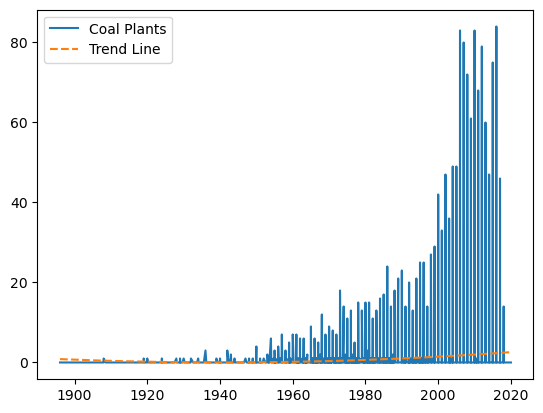

In [26]:
# Use NumPy to compute a smoothed trend line
x = fuel_by_year.index.to_numpy()
y = fuel_by_year['Coal'].to_numpy()
coeffs = np.polyfit(x, y, 2)  # 4rd-degree polynomial
trend = np.polyval(coeffs, x)

plt.plot(x, y, label='Coal Plants')
plt.plot(x, trend, '--', label='Trend Line')
plt.legend()
plt.show()